# Imports

In [1]:
import csv
import itertools
import operator
import numpy as np
import nltk
import sys
from datetime import datetime

import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
plt.style.use('seaborn-white')
import re
from nltk import tokenize
import re
from collections import Counter

# Load 3 Text Books and Concatenate

In [2]:
#text files concatenation 
filenames = ['A_Journey_to_the_Center_of_the_Earth.txt', 'From_the_Earth_to_the_Moon.txt', 'The_master_of_the_world.txt']
with open('/Users/pprusty05/google_drive/Deep_Learning/assignment3/Text_file_for_training.txt', 'w+') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

# Preprocess data

In [3]:
unknown_token = "*"
word_start_token = "S"
word_end_token = "E"

## Clean Text file, tokenize words and append word start and end token 


In [4]:
# here I am tokenize the texts in to words and then appending S and E to word start and end
with open ('Text_file_for_training.txt', 'r') as f:
    
    text = f.read()
    tokenized_sent = nltk.word_tokenize(text)
    words=[x.replace('\n',' ') for x in tokenized_sent]
    #words=[x.replace(' ','') for x in tokenized_sent]
    
    words = [re.sub('[^a-zA-Z0-9]', '', x)for x in words]
    words = [word.lower() for word in words]
    
    new_words = ["%s %s %s" % (word_start_token, x, word_end_token) for x in words]
    
print( "Parsed %d words." % (len(words)))

    


Parsed 273460 words.


In [5]:
words

['project',
 'gutenberg',
 's',
 'a',
 'journey',
 'to',
 'the',
 'centre',
 'of',
 'the',
 'earth',
 '',
 'by',
 'jules',
 'verne',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 '',
 'you',
 'may',
 'copy',
 'it',
 '',
 'give',
 'it',
 'away',
 'or',
 'reuse',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'wwwgutenbergorg',
 'title',
 '',
 'a',
 'journey',
 'to',
 'the',
 'centre',
 'of',
 'the',
 'earth',
 'author',
 '',
 'jules',
 'verne',
 'release',
 'date',
 '',
 'july',
 '18',
 '',
 '2006',
 '',
 'ebook',
 '',
 '18857',
 '',
 'last',
 'updated',
 '',
 'december',
 '27',
 '',
 '2012',
 'language',
 '',
 'english',
 'character',
 'set',
 'encoding',
 '',
 'ascii',
 '',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'centre',
 'of',
 '

In [6]:
#here I am tokenizing the words to character and getting the uniques characters fromthe text file
# Tokenize the words into char
train_data = open('Text_file_for_training.txt', 'r').read() 
chars = list(set(train_data))
data_size,char_size = len(train_data), len(chars)
print("data has %d characters, %d unique" %(data_size, char_size))
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }


data has 1336569 characters, 93 unique


In [7]:
# Count the character frequencies
char_freq=(Counter(''.join(words)))
print(char_freq)


Counter({'e': 135934, 't': 99788, 'a': 81042, 'o': 79615, 'i': 72483, 'n': 70915, 's': 64262, 'r': 63853, 'h': 61065, 'd': 42435, 'l': 41951, 'c': 31566, 'u': 30740, 'm': 25989, 'f': 25020, 'w': 23665, 'p': 19989, 'g': 18503, 'y': 18486, 'b': 16484, 'v': 10389, 'k': 6356, 'x': 2200, 'j': 1757, 'q': 1128, '0': 775, 'z': 608, '1': 481, '2': 275, '3': 192, '4': 184, '5': 179, '8': 162, '6': 123, '7': 107, '9': 93})


In [8]:
# Tokenize the sentences into words
tokenized_char = [list(word) for word in new_words]
print(tokenized_char)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
# Replace all words not in our vocabulary with the unknown token
for i, wrd in enumerate(tokenized_char):
    tokenized_char[i] = [w if w in char_to_ix else unknown_token for w in wrd]

In [10]:
print("\nExample sentence: '%s'" % new_words[0])
print("\nExample sentence after Pre-processing: '%s'" % tokenized_char[0])


Example sentence: 'S project E'

Example sentence after Pre-processing: '['S', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'E']'


# XTrain and yTrain

In [11]:
# Create the training data
XTrain = np.asarray([[char_to_ix[w] for w in sent[:-1]] for sent in tokenized_char])
yTrain = np.asarray([[char_to_ix[w] for w in sent[1:]] for sent in tokenized_char])

In [12]:
XTrain.shape

(273460,)

In [13]:
# Print an training data example
x_example, y_example = XTrain[10], yTrain[10]
print ("x:\n%s\n%s" % (" ".join([ix_to_char[x] for x in x_example]), x_example))
print ("\ny:\n%s\n%s" % (" ".join([ix_to_char[x] for x in y_example]), y_example))

x:
S   e a r t h  
[5, 36, 64, 47, 39, 12, 10, 36]

y:
  e a r t h   E
[36, 64, 47, 39, 12, 10, 36, 60]


#  Character level Vanilla RNN

In [14]:
class RNNVanilla:
     
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=10):
        
        # Assign instance variables
        self.word_dim = word_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        
        
    def softmax(self,x):
        xt = np.exp(x - np.max(x))
        return xt / np.sum(xt)
    
    def forward_propagation(self, x):
        # The total number of time steps
        T = len(x)

        # During forward propagation we save all hidden states in s because need them later.

        # We add one additional element for the initial hidden, which we set to 0
        s = np.zeros((T + 1, self.hidden_dim))
        s[-1] = np.zeros(self.hidden_dim)

        # The outputs at each time step. Again, we save them for later.
        o = np.zeros((T, self.word_dim))

        # For each time step...
        for t in np.arange(T):
            # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
            s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
            o[t] = self.softmax(self.V.dot(s[t]))
        return [o, s] 

    def predict(self, x):
        # Perform forward propagation and return index of the highest score
        o, s = self.forward_propagation(x)
        return np.argmax(o, axis=1)

    def calculate_total_loss(self, x, y):
        L = 0

        # For each sentence...
        for i in np.arange(len(y)):
            o, s = self.forward_propagation(x[i])

            # We only care about our prediction of the "correct" words
            correct_word_predictions = o[np.arange(len(y[i])), y[i]]

            # Add to the loss based on how off we were
            L += -1 * sum(np.log(correct_word_predictions))
        return L
 
    def calculate_loss(self, x, y):
        # Divide the total loss by the number of training examples
        N = sum((len(y_i) for y_i in y))
        return self.calculate_total_loss(x,y)/N
    def bptt(self, x, y):
        T = len(y)
        # Perform forward propagation
        o, s = self.forward_propagation(x)
        # We accumulate the gradients in these variables
        dLdU = np.zeros(self.U.shape)
        dLdV = np.zeros(self.V.shape)
        dLdW = np.zeros(self.W.shape)
        delta_o = o
        delta_o[np.arange(len(y)), y] -= 1.
        # For each output backwards...
        for t in np.arange(T)[::-1]:
            dLdV += np.outer(delta_o[t], s[t].T)

            # Initial delta calculation
            delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))

            # Backpropagation through time (for at most self.bptt_truncate steps)
            for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:

                # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
                dLdW += np.outer(delta_t, s[bptt_step-1])              
                dLdU[:,x[bptt_step]] += delta_t

                # Update delta for next step
                delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
        return [dLdU, dLdV, dLdW]
    
    def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
        # Calculate the gradients using backpropagation. We want to checker if these are correct.
        bptt_gradients = self.bptt(x, y)

        # List of all parameters we want to check.
        model_parameters = ['U', 'V', 'W']

        # Gradient check for each parameter
        for pidx, pname in enumerate(model_parameters):
            # Get the actual parameter value from the mode, e.g. model.W
            parameter = operator.attrgetter(pname)(self)
            print ("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
            # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
            it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
            while not it.finished:
                ix = it.multi_index
                # Save the original value so we can reset it later
                original_value = parameter[ix]
                # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
                parameter[ix] = original_value + h
                gradplus = self.calculate_total_loss([x],[y])
                parameter[ix] = original_value - h
                gradminus = self.calculate_total_loss([x],[y])
                estimated_gradient = (gradplus - gradminus)/(2*h)
                # Reset parameter to original value
                parameter[ix] = original_value
                # The gradient for this parameter calculated using backpropagation
                backprop_gradient = bptt_gradients[pidx][ix]
                # calculate The relative error: (|x - y|/(|x| + |y|))
                relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
                # If the error is to large fail the gradient check
                if relative_error > error_threshold:
                    print ("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                    print ("+h Loss: %f" % gradplus)
                    print ("-h Loss: %f" % gradminus)
                    print ("Estimated_gradient: %f" % estimated_gradient)
                    print ("Backpropagation gradient: %f" % backprop_gradient)
                    print ("Relative Error: %f" % relative_error)
                    return
                it.iternext()
            print ("Gradient check for parameter %s passed." % (pname))
            
            # Performs one step of SGD.
    def numpy_sdg_step(self, x, y, learning_rate):
        # Calculate the gradients
        dLdU, dLdV, dLdW = self.bptt(x, y)
        # Change parameters according to gradients and learning rate
        self.U -= learning_rate * dLdU
        self.V -= learning_rate * dLdV
        self.W -= learning_rate * dLdW
        
    def generate_sentence(self,model):
       
    # We start the sentence with the start token
        new_sentence = [(XTrain[10])[0]]

        # Repeat until we get an end token
        while not new_sentence[-1] == char_to_ix[word_end_token]:
            next_word_probs,_ = model.forward_propagation(new_sentence)
            sampled_word = char_to_ix[unknown_token]
            # We don't want to sample unknown words
            while sampled_word == char_to_ix[unknown_token]:
                samples = np.random.multinomial(1, next_word_probs[-1])
                sampled_word = np.argmax(samples)
            new_sentence.append(sampled_word)
        sentence_str = [ix_to_char[x] for x in new_sentence[1:-1]]
        return sentence_str


    def train_with_sgd(self, X_train, y_train, break_points_list, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
        # We keep track of the losses so we can plot them later
        losses = []
        loss_per_epoch=[]
        num_examples_seen = 0
        for epoch in range(nepoch):
            # Optionally evaluate the loss
            if (epoch % evaluate_loss_after == 0):
                loss = model.calculate_loss(X_train, y_train)
                losses.append((num_examples_seen, loss))
                loss_per_epoch.append(loss)
                time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
                # Adjust the learning rate if loss increases
                if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                    learning_rate = learning_rate * 0.5 
                    print ("Setting learning rate to %f" % learning_rate)
                sys.stdout.flush()
            if epoch in break_points_list:
                print("========================")
                print("Start Pred -- ")
                predictions = model.predict(XTrain[10])
                print("input_characters>")
                print(XTrain[10])
                print('%s'%" ".join([ix_to_char[x] for x in XTrain[10]]))
                #print(predictions.shape)
                print("output_characters>")
                print(predictions)
                print('%s'%" ".join([ix_to_char[x] for x in predictions]))
                
                num_sentences = 1
                senten_min_length = 5

                for i in range(num_sentences):
                    sent = []
                    # We want long sentences, not sentences with one or two words
                    while len(sent) < senten_min_length:
                        sent = self.generate_sentence(model)
                    print("Generate Words by feeding the first character to the model at epoch--",epoch)
                    print (" ".join(sent))
                
                print("========================")


            # For each training example...
            for i in range(len(y_train)):
                # One SGD step
                model.numpy_sdg_step(X_train[i], y_train[i], learning_rate)
                num_examples_seen += 1
            #Plot the Loss Curves
        print(loss_per_epoch)
        plt.figure(figsize=[8,6])
        plt.plot(loss_per_epoch,'r',linewidth=3.0)
        plt.legend(['Training loss'],fontsize=18)
        plt.xlabel('Epochs ',fontsize=16)
        plt.ylabel('Loss',fontsize=16)
        plt.title('Loss Curves',fontsize=16)



# Report gradient check routine

In [15]:
# To avoid performing millions of expensive calculations we use a smaller vocabulary size for checking.
grad_check_vocab_size = 100
np.random.seed(10)
model = RNNVanilla(grad_check_vocab_size, 10, bptt_truncate=1000)
model.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


/Users/pprusty05/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


# Report the training loss vs epochs as a plot, output of the network at breakpoints.

2019-11-06 23:17:34: Loss after num_examples_seen=0 epoch=0: 4.520456
2019-11-06 23:17:36: Loss after num_examples_seen=500 epoch=1: 2.232250
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36 60 10 36 36 36 36 60]
  E h         E
Generate Words by feeding the first character to the model at epoch-- 1
  2 < l r e  
2019-11-06 23:17:37: Loss after num_examples_seen=1000 epoch=2: 1.994184
2019-11-06 23:17:38: Loss after num_examples_seen=1500 epoch=3: 1.874169
2019-11-06 23:17:39: Loss after num_examples_seen=2000 epoch=4: 1.779009
2019-11-06 23:17:40: Loss after num_examples_seen=2500 epoch=5: 1.714371
2019-11-06 23:17:41: Loss after num_examples_seen=3000 epoch=6: 1.665611
2019-11-06 23:17:43: Loss after num_examples_seen=3500 epoch=7: 1.624559
2019-11-06 23:17:44: Loss after num_examples_seen=4000 epoch=8: 1.588366
2019-11-06 23:17:45: Loss after num_examples_seen=4500 epoch=9: 1.555591
2019-11-06 23:17:46: Loss after num_examples_s

2019-11-06 23:19:21: Loss after num_examples_seen=40000 epoch=80: 1.013592
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36  6 47 39 12 10 36 60]
  c a r t h   E
Generate Words by feeding the first character to the model at epoch-- 80
  m h e r t i
2019-11-06 23:19:23: Loss after num_examples_seen=40500 epoch=81: 1.012285
2019-11-06 23:19:24: Loss after num_examples_seen=41000 epoch=82: 1.011018
2019-11-06 23:19:25: Loss after num_examples_seen=41500 epoch=83: 1.009803
2019-11-06 23:19:26: Loss after num_examples_seen=42000 epoch=84: 1.008655
2019-11-06 23:19:27: Loss after num_examples_seen=42500 epoch=85: 1.007593
2019-11-06 23:19:29: Loss after num_examples_seen=43000 epoch=86: 1.006641
2019-11-06 23:19:30: Loss after num_examples_seen=43500 epoch=87: 1.005820
2019-11-06 23:19:31: Loss after num_examples_seen=44000 epoch=88: 1.005151
2019-11-06 23:19:32: Loss after num_examples_seen=44500 epoch=89: 1.004631
2019-11-06 23:19:33: 

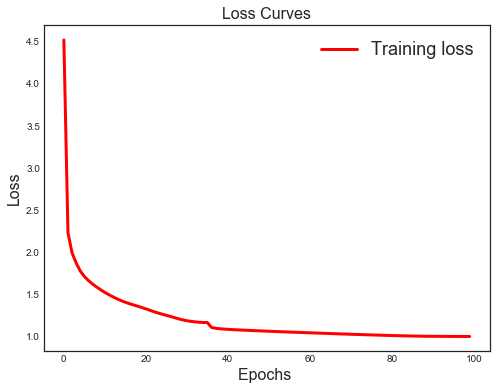

In [16]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model = RNNVanilla(len(chars))
losses = model.train_with_sgd(XTrain[:500], yTrain[:500],break_points_list=[1,10,20,30,40,50,60,70,80,90], 
                        nepoch=100, evaluate_loss_after=1)

# Number of hidden units: Try doubling and halving your number of hidden units. And after training, plot the training loss vs the number of training epochs, and show the text sampling


## Halving hidden layers

In [20]:
#reducing hidden layers
class RNNVanilla_1:
     
    def __init__(self, word_dim, hidden_dim=50, bptt_truncate=4):
        
        # Assign instance variables
        self.word_dim = word_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        
        
    def softmax(self,x):
        xt = np.exp(x - np.max(x))
        return xt / np.sum(xt)
    
    def forward_propagation(self, x):
        # The total number of time steps
        T = len(x)

        # During forward propagation we save all hidden states in s because need them later.

        # We add one additional element for the initial hidden, which we set to 0
        s = np.zeros((T + 1, self.hidden_dim))
        s[-1] = np.zeros(self.hidden_dim)

        # The outputs at each time step. Again, we save them for later.
        o = np.zeros((T, self.word_dim))

        # For each time step...
        for t in np.arange(T):
            # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
            s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
            o[t] = self.softmax(self.V.dot(s[t]))
        return [o, s] 
    
    def generate_sentence(self, model):  
        # We start the sentence with the start token
        new_sentence = [(XTrain[10])[0]]

        # Repeat until we get an end token
        while not new_sentence[-1] == char_to_ix[word_end_token]:
            next_word_probs,_ = model.forward_propagation(new_sentence)
            sampled_word = char_to_ix[unknown_token]
            # We don't want to sample unknown words
            while sampled_word == char_to_ix[unknown_token]:
                samples = np.random.multinomial(1, next_word_probs[-1])
                sampled_word = np.argmax(samples)
            new_sentence.append(sampled_word)
        sentence_str = [ix_to_char[x] for x in new_sentence[1:-1]]
        return sentence_str


    def predict(self, x):
        # Perform forward propagation and return index of the highest score
        o, s = self.forward_propagation(x)
        return np.argmax(o, axis=1)

    def calculate_total_loss(self, x, y):
        L = 0

        # For each sentence...
        for i in np.arange(len(y)):
            o, s = self.forward_propagation(x[i])

            # We only care about our prediction of the "correct" words
            correct_word_predictions = o[np.arange(len(y[i])), y[i]]

            # Add to the loss based on how off we were
            L += -1 * sum(np.log(correct_word_predictions))
        return L
 
    def calculate_loss(self, x, y):
        # Divide the total loss by the number of training examples
        N = sum((len(y_i) for y_i in y))
        return self.calculate_total_loss(x,y)/N
    def bptt(self, x, y):
        T = len(y)
        # Perform forward propagation
        o, s = self.forward_propagation(x)
        # We accumulate the gradients in these variables
        dLdU = np.zeros(self.U.shape)
        dLdV = np.zeros(self.V.shape)
        dLdW = np.zeros(self.W.shape)
        delta_o = o
        delta_o[np.arange(len(y)), y] -= 1.
        # For each output backwards...
        for t in np.arange(T)[::-1]:
            dLdV += np.outer(delta_o[t], s[t].T)

            # Initial delta calculation
            delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))

            # Backpropagation through time (for at most self.bptt_truncate steps)
            for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:

                # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
                dLdW += np.outer(delta_t, s[bptt_step-1])              
                dLdU[:,x[bptt_step]] += delta_t

                # Update delta for next step
                delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
        return [dLdU, dLdV, dLdW]
    
    def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
        # Calculate the gradients using backpropagation. We want to checker if these are correct.
        bptt_gradients = self.bptt(x, y)

        # List of all parameters we want to check.
        model_parameters = ['U', 'V', 'W']

        # Gradient check for each parameter
        for pidx, pname in enumerate(model_parameters):
            # Get the actual parameter value from the mode, e.g. model.W
            parameter = operator.attrgetter(pname)(self)
            print ("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
            # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
            it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
            while not it.finished:
                ix = it.multi_index
                # Save the original value so we can reset it later
                original_value = parameter[ix]
                # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
                parameter[ix] = original_value + h
                gradplus = self.calculate_total_loss([x],[y])
                parameter[ix] = original_value - h
                gradminus = self.calculate_total_loss([x],[y])
                estimated_gradient = (gradplus - gradminus)/(2*h)
                # Reset parameter to original value
                parameter[ix] = original_value
                # The gradient for this parameter calculated using backpropagation
                backprop_gradient = bptt_gradients[pidx][ix]
                # calculate The relative error: (|x - y|/(|x| + |y|))
                relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
                # If the error is to large fail the gradient check
                if relative_error > error_threshold:
                    print ("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                    print ("+h Loss: %f" % gradplus)
                    print ("-h Loss: %f" % gradminus)
                    print ("Estimated_gradient: %f" % estimated_gradient)
                    print ("Backpropagation gradient: %f" % backprop_gradient)
                    print ("Relative Error: %f" % relative_error)
                    return
                it.iternext()
            print ("Gradient check for parameter %s passed." % (pname))
            
            # Performs one step of SGD.
    def numpy_sdg_step(self, x, y, learning_rate):
        # Calculate the gradients
        dLdU, dLdV, dLdW = self.bptt(x, y)
        # Change parameters according to gradients and learning rate
        self.U -= learning_rate * dLdU
        self.V -= learning_rate * dLdV
        self.W -= learning_rate * dLdW
    def train_with_sgd(self, X_train, y_train, break_points_list, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
        # We keep track of the losses so we can plot them later
        losses = []
        loss_per_epoch=[]
        num_examples_seen = 0
        for epoch in range(nepoch):
            # Optionally evaluate the loss
            if (epoch % evaluate_loss_after == 0):
                loss = model.calculate_loss(X_train, y_train)
                losses.append((num_examples_seen, loss))
                loss_per_epoch.append(loss)
                time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
                # Adjust the learning rate if loss increases
                if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                    learning_rate = learning_rate * 0.5 
                    print ("Setting learning rate to %f" % learning_rate)
                sys.stdout.flush()
            if epoch in break_points_list:
                print("========================")
                print("Start Pred -- ")
                predictions = model.predict(XTrain[10])
                print("input_characters>")
                print(XTrain[10])
                print('%s'%" ".join([ix_to_char[x] for x in XTrain[10]]))
                #print(predictions.shape)
                print("output_characters>")
                print(predictions)
                print('%s'%" ".join([ix_to_char[x] for x in predictions]))
                
                num_sentences = 1
                senten_min_length = 5

                for i in range(num_sentences):
                    sent = []
                    # We want long sentences, not sentences with one or two words
                    while len(sent) < senten_min_length:
                        sent = self.generate_sentence(model)
                    print("Generate Words by feeding the first character to the model at epoch--",epoch)
                    print (" ".join(sent))
                
                print("========================")

            # For each training example...
            for i in range(len(y_train)):
                # One SGD step
                model.numpy_sdg_step(X_train[i], y_train[i], learning_rate)
                num_examples_seen += 1
            #Plot the Loss Curves
        print(loss_per_epoch)
        plt.figure(figsize=[8,6])
        plt.plot(loss_per_epoch,'r',linewidth=3.0)
        plt.legend(['Training loss'],fontsize=18)
        plt.xlabel('Epochs ',fontsize=16)
        plt.ylabel('Loss',fontsize=16)
        plt.title('Loss Curves',fontsize=16)



2019-11-06 23:25:39: Loss after num_examples_seen=0 epoch=0: 1.002185
2019-11-06 23:25:41: Loss after num_examples_seen=500 epoch=1: 1.334171
Setting learning rate to 0.002500
2019-11-06 23:25:42: Loss after num_examples_seen=1000 epoch=2: 1.050904
2019-11-06 23:25:44: Loss after num_examples_seen=1500 epoch=3: 1.020802
2019-11-06 23:25:45: Loss after num_examples_seen=2000 epoch=4: 1.013143
2019-11-06 23:25:47: Loss after num_examples_seen=2500 epoch=5: 0.978995
2019-11-06 23:25:48: Loss after num_examples_seen=3000 epoch=6: 0.973052
2019-11-06 23:25:49: Loss after num_examples_seen=3500 epoch=7: 0.971488
2019-11-06 23:25:50: Loss after num_examples_seen=4000 epoch=8: 0.968718
2019-11-06 23:25:51: Loss after num_examples_seen=4500 epoch=9: 0.969388
Setting learning rate to 0.001250
2019-11-06 23:25:52: Loss after num_examples_seen=5000 epoch=10: 0.926892
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36  6 47 39 12 10 36 60]
  c a 

2019-11-06 23:27:16: Loss after num_examples_seen=40500 epoch=81: 0.878997
2019-11-06 23:27:17: Loss after num_examples_seen=41000 epoch=82: 0.878939
2019-11-06 23:27:19: Loss after num_examples_seen=41500 epoch=83: 0.878892
2019-11-06 23:27:20: Loss after num_examples_seen=42000 epoch=84: 0.878855
2019-11-06 23:27:21: Loss after num_examples_seen=42500 epoch=85: 0.878829
2019-11-06 23:27:22: Loss after num_examples_seen=43000 epoch=86: 0.878810
2019-11-06 23:27:23: Loss after num_examples_seen=43500 epoch=87: 0.878800
2019-11-06 23:27:24: Loss after num_examples_seen=44000 epoch=88: 0.878797
2019-11-06 23:27:25: Loss after num_examples_seen=44500 epoch=89: 0.878799
Setting learning rate to 0.000625
2019-11-06 23:27:27: Loss after num_examples_seen=45000 epoch=90: 0.838910
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36  6 47 39 12 10 36 60]
  c a r t h   E
Generate Words by feeding the first character to the model at epoch-- 90
 

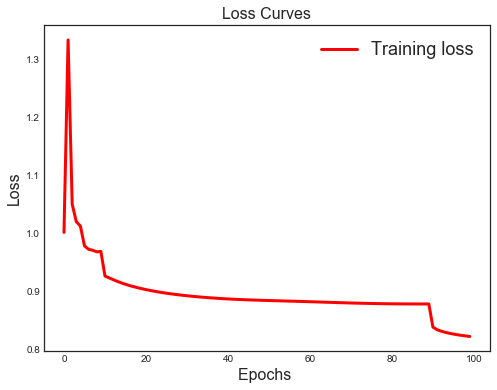

In [21]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model1 = RNNVanilla_1(len(chars))
losses = model1.train_with_sgd(XTrain[:500], yTrain[:500],break_points_list=[10,20,30,40,50,60,70,80,90],
                              nepoch=100, learning_rate=0.005, evaluate_loss_after=1)

## gradient check after halving

In [22]:
# To avoid performing millions of expensive calculations we use a smaller vocabulary size for checking.
grad_check_vocab_size = 100
np.random.seed(10)
model1 = RNNVanilla_1(grad_check_vocab_size, 10, bptt_truncate=1000)
model1.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


/Users/pprusty05/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


## Doubling hidden units

In [26]:
#doubling hidden layers
class RNNVanilla_2:
     
    def __init__(self, word_dim, hidden_dim=200, bptt_truncate=4):
        
        # Assign instance variables
        self.word_dim = word_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        
        
    def softmax(self,x):
        xt = np.exp(x - np.max(x))
        return xt / np.sum(xt)
    
    def forward_propagation(self, x):
        # The total number of time steps
        T = len(x)

        # During forward propagation we save all hidden states in s because need them later.

        # We add one additional element for the initial hidden, which we set to 0
        s = np.zeros((T + 1, self.hidden_dim))
        s[-1] = np.zeros(self.hidden_dim)

        # The outputs at each time step. Again, we save them for later.
        o = np.zeros((T, self.word_dim))

        # For each time step...
        for t in np.arange(T):
            # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
            s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
            o[t] = self.softmax(self.V.dot(s[t]))
        return [o, s] 

    def predict(self, x):
        # Perform forward propagation and return index of the highest score
        o, s = self.forward_propagation(x)
        return np.argmax(o, axis=1)

    def generate_sentence(self, model):  
        # We start the sentence with the start token
        new_sentence = [(XTrain[10])[0]]

        # Repeat until we get an end token
        while not new_sentence[-1] == char_to_ix[word_end_token]:
            next_word_probs,_ = model.forward_propagation(new_sentence)
            sampled_word = char_to_ix[unknown_token]
            # We don't want to sample unknown words
            while sampled_word == char_to_ix[unknown_token]:
                samples = np.random.multinomial(1, next_word_probs[-1])
                sampled_word = np.argmax(samples)
            new_sentence.append(sampled_word)
        sentence_str = [ix_to_char[x] for x in new_sentence[1:-1]]
        return sentence_str

    def calculate_total_loss(self, x, y):
        L = 0

        # For each sentence...
        for i in np.arange(len(y)):
            o, s = self.forward_propagation(x[i])

            # We only care about our prediction of the "correct" words
            correct_word_predictions = o[np.arange(len(y[i])), y[i]]

            # Add to the loss based on how off we were
            L += -1 * sum(np.log(correct_word_predictions))
        return L
 
    def calculate_loss(self, x, y):
        # Divide the total loss by the number of training examples
        N = sum((len(y_i) for y_i in y))
        return self.calculate_total_loss(x,y)/N
    def bptt(self, x, y):
        T = len(y)
        # Perform forward propagation
        o, s = self.forward_propagation(x)
        # We accumulate the gradients in these variables
        dLdU = np.zeros(self.U.shape)
        dLdV = np.zeros(self.V.shape)
        dLdW = np.zeros(self.W.shape)
        delta_o = o
        delta_o[np.arange(len(y)), y] -= 1.
        # For each output backwards...
        for t in np.arange(T)[::-1]:
            dLdV += np.outer(delta_o[t], s[t].T)

            # Initial delta calculation
            delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))

            # Backpropagation through time (for at most self.bptt_truncate steps)
            for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:

                # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
                dLdW += np.outer(delta_t, s[bptt_step-1])              
                dLdU[:,x[bptt_step]] += delta_t

                # Update delta for next step
                delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
        return [dLdU, dLdV, dLdW]
    
    def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
        # Calculate the gradients using backpropagation. We want to checker if these are correct.
        bptt_gradients = self.bptt(x, y)

        # List of all parameters we want to check.
        model_parameters = ['U', 'V', 'W']

        # Gradient check for each parameter
        for pidx, pname in enumerate(model_parameters):
            # Get the actual parameter value from the mode, e.g. model.W
            parameter = operator.attrgetter(pname)(self)
            print ("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
            # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
            it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
            while not it.finished:
                ix = it.multi_index
                # Save the original value so we can reset it later
                original_value = parameter[ix]
                # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
                parameter[ix] = original_value + h
                gradplus = self.calculate_total_loss([x],[y])
                parameter[ix] = original_value - h
                gradminus = self.calculate_total_loss([x],[y])
                estimated_gradient = (gradplus - gradminus)/(2*h)
                # Reset parameter to original value
                parameter[ix] = original_value
                # The gradient for this parameter calculated using backpropagation
                backprop_gradient = bptt_gradients[pidx][ix]
                # calculate The relative error: (|x - y|/(|x| + |y|))
                relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
                # If the error is to large fail the gradient check
                if relative_error > error_threshold:
                    print ("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                    print ("+h Loss: %f" % gradplus)
                    print ("-h Loss: %f" % gradminus)
                    print ("Estimated_gradient: %f" % estimated_gradient)
                    print ("Backpropagation gradient: %f" % backprop_gradient)
                    print ("Relative Error: %f" % relative_error)
                    return
                it.iternext()
            print ("Gradient check for parameter %s passed." % (pname))
            
            # Performs one step of SGD.
    def numpy_sdg_step(self, x, y, learning_rate):
        # Calculate the gradients
        dLdU, dLdV, dLdW = self.bptt(x, y)
        # Change parameters according to gradients and learning rate
        self.U -= learning_rate * dLdU
        self.V -= learning_rate * dLdV
        self.W -= learning_rate * dLdW
    def train_with_sgd(self, X_train, y_train, break_points_list, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
        # We keep track of the losses so we can plot them later
        losses = []
        loss_per_epoch=[]
        num_examples_seen = 0
        for epoch in range(nepoch):
            # Optionally evaluate the loss
            if (epoch % evaluate_loss_after == 0):
                loss = model.calculate_loss(X_train, y_train)
                losses.append((num_examples_seen, loss))
                loss_per_epoch.append(loss)
                time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
                # Adjust the learning rate if loss increases
                if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                    learning_rate = learning_rate * 0.5 
                    print ("Setting learning rate to %f" % learning_rate)
                sys.stdout.flush()
            if epoch in break_points_list:
                print("========================")
                print("Start Pred -- ")
                predictions = model.predict(XTrain[10])
                print("input_characters>")
                print(XTrain[10])
                print('%s'%" ".join([ix_to_char[x] for x in XTrain[10]]))
                #print(predictions.shape)
                print("output_characters>")
                print(predictions)
                print('%s'%" ".join([ix_to_char[x] for x in predictions]))
                
                num_sentences = 1
                senten_min_length = 5

                for i in range(num_sentences):
                    sent = []
                    # We want long sentences, not sentences with one or two words
                    while len(sent) < senten_min_length:
                        sent = self.generate_sentence(model)
                    print("Generate Words by feeding the first character to the model at epoch--",epoch)
                    print (" ".join(sent))
                
                print("========================")
            # For each training example...
            for i in range(len(y_train)):
                # One SGD step
                model.numpy_sdg_step(X_train[i], y_train[i], learning_rate)
                num_examples_seen += 1
            #Plot the Loss Curves
        print(loss_per_epoch)
        plt.figure(figsize=[8,6])
        plt.plot(loss_per_epoch,'r',linewidth=3.0)
        plt.legend(['Training loss'],fontsize=18)
        plt.xlabel('Epochs ',fontsize=16)
        plt.ylabel('Loss',fontsize=16)
        plt.title('Loss Curves',fontsize=16)



2019-11-06 23:32:37: Loss after num_examples_seen=0 epoch=0: 0.844875
2019-11-06 23:32:39: Loss after num_examples_seen=500 epoch=1: 1.169604
Setting learning rate to 0.002500
2019-11-06 23:32:40: Loss after num_examples_seen=1000 epoch=2: 0.970497
2019-11-06 23:32:42: Loss after num_examples_seen=1500 epoch=3: 0.900884
2019-11-06 23:32:44: Loss after num_examples_seen=2000 epoch=4: 0.895564
2019-11-06 23:32:45: Loss after num_examples_seen=2500 epoch=5: 0.889126
2019-11-06 23:32:47: Loss after num_examples_seen=3000 epoch=6: 0.887289
2019-11-06 23:32:48: Loss after num_examples_seen=3500 epoch=7: 0.886229
2019-11-06 23:32:50: Loss after num_examples_seen=4000 epoch=8: 0.886207
2019-11-06 23:32:52: Loss after num_examples_seen=4500 epoch=9: 0.886897
Setting learning rate to 0.001250
2019-11-06 23:32:54: Loss after num_examples_seen=5000 epoch=10: 0.838184
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36  6 47 69 12 10 36 60]
  c a 

2019-11-06 23:34:25: Loss after num_examples_seen=40500 epoch=81: 0.774497
2019-11-06 23:34:26: Loss after num_examples_seen=41000 epoch=82: 0.774267
2019-11-06 23:34:27: Loss after num_examples_seen=41500 epoch=83: 0.774040
2019-11-06 23:34:29: Loss after num_examples_seen=42000 epoch=84: 0.773817
2019-11-06 23:34:30: Loss after num_examples_seen=42500 epoch=85: 0.773597
2019-11-06 23:34:31: Loss after num_examples_seen=43000 epoch=86: 0.773380
2019-11-06 23:34:32: Loss after num_examples_seen=43500 epoch=87: 0.773168
2019-11-06 23:34:33: Loss after num_examples_seen=44000 epoch=88: 0.772958
2019-11-06 23:34:34: Loss after num_examples_seen=44500 epoch=89: 0.772753
2019-11-06 23:34:36: Loss after num_examples_seen=45000 epoch=90: 0.772550
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36  6 47 39 12 10 36 60]
  c a r t h   E
Generate Words by feeding the first character to the model at epoch-- 90
  c h a p t e r  
2019-11-06 23:34:

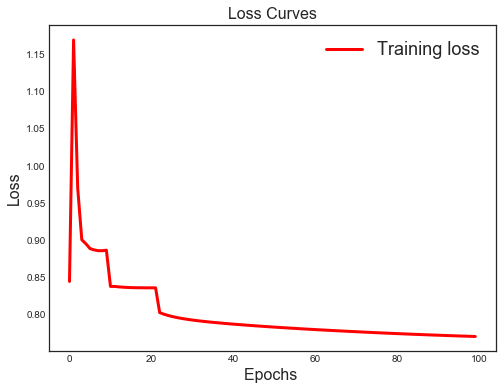

In [27]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model2 = RNNVanilla_2(len(chars))
losses = model2.train_with_sgd(XTrain[:500], yTrain[:500],break_points_list=[10,20,30,40,50,60,70,80,90],
                              nepoch=100, learning_rate=0.005, evaluate_loss_after=1)

## gradient check after doubling hidden units

In [28]:
# To avoid performing millions of expensive calculations we use a smaller vocabulary size for checking.
grad_check_vocab_size = 100
np.random.seed(10)
model2 = RNNVanilla_2(grad_check_vocab_size, 10, bptt_truncate=1000)
model2.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


/Users/pprusty05/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:137: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


#  Discuss your findings

# Observation

## By increasing the hidden layers

-the processing time increased. 

-loss plot did decrease faster.

-character prediction improved.

## By reducing hidden layers

-the processing time decresed. 

-loss plot did not decrease faster or as lower as with higher hidden layers.

-character prediction degraded.




# Sentence length: Try doubling and halving your length of sentence that feeds into the network. And after training, plot the training loss vs the number of training epochs, and show the text sampling results. 


2019-11-06 23:34:52: Loss after num_examples_seen=0 epoch=0: 4.520170
2019-11-06 23:34:55: Loss after num_examples_seen=1000 epoch=1: 2.049460
2019-11-06 23:34:58: Loss after num_examples_seen=2000 epoch=2: 1.902007
2019-11-06 23:35:01: Loss after num_examples_seen=3000 epoch=3: 1.807512
2019-11-06 23:35:03: Loss after num_examples_seen=4000 epoch=4: 1.743794
2019-11-06 23:35:06: Loss after num_examples_seen=5000 epoch=5: 1.694558
2019-11-06 23:35:09: Loss after num_examples_seen=6000 epoch=6: 1.653011
2019-11-06 23:35:12: Loss after num_examples_seen=7000 epoch=7: 1.618246
2019-11-06 23:35:15: Loss after num_examples_seen=8000 epoch=8: 1.588798
2019-11-06 23:35:17: Loss after num_examples_seen=9000 epoch=9: 1.562903
2019-11-06 23:35:20: Loss after num_examples_seen=10000 epoch=10: 1.539987
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36 47 39 69 36 10 64 60]
  a r s   h e E
Generate Words by feeding the first character to the mod

2019-11-06 23:41:46: Loss after num_examples_seen=81000 epoch=81: 1.101320
2019-11-06 23:41:49: Loss after num_examples_seen=82000 epoch=82: 1.100473
2019-11-06 23:41:53: Loss after num_examples_seen=83000 epoch=83: 1.099660
2019-11-06 23:41:56: Loss after num_examples_seen=84000 epoch=84: 1.098877
2019-11-06 23:41:59: Loss after num_examples_seen=85000 epoch=85: 1.098123
2019-11-06 23:42:02: Loss after num_examples_seen=86000 epoch=86: 1.097396
2019-11-06 23:42:05: Loss after num_examples_seen=87000 epoch=87: 1.096696
2019-11-06 23:42:09: Loss after num_examples_seen=88000 epoch=88: 1.096019
2019-11-06 23:42:12: Loss after num_examples_seen=89000 epoch=89: 1.095367
2019-11-06 23:42:15: Loss after num_examples_seen=90000 epoch=90: 1.094737
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36 12 83 39 12 10 36 60]
  t n r t h   E
Generate Words by feeding the first character to the model at epoch-- 90
  t e r r s o n  
2019-11-06 23:42:

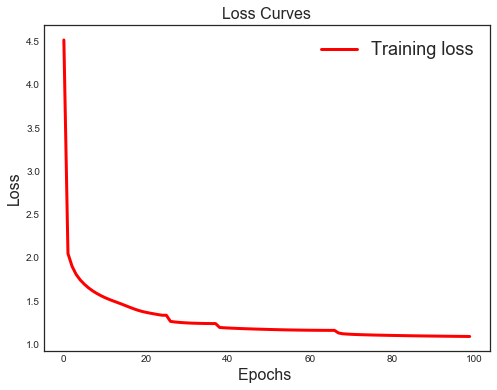

In [29]:
#increasing length of sentence that feeds into the network
np.random.seed(10)
# Train on a small subset of the data to see what happens
model = RNNVanilla(len(chars))
losses = model.train_with_sgd(XTrain[:1000], yTrain[:1000],break_points_list=[10,20,30,40,50,60,70,80,90],
                              nepoch=100, learning_rate=0.005, evaluate_loss_after=1)

2019-11-06 23:42:47: Loss after num_examples_seen=0 epoch=0: 4.521373
2019-11-06 23:42:47: Loss after num_examples_seen=100 epoch=1: 4.342255
2019-11-06 23:42:47: Loss after num_examples_seen=200 epoch=2: 3.061407
2019-11-06 23:42:48: Loss after num_examples_seen=300 epoch=3: 2.545218
2019-11-06 23:42:48: Loss after num_examples_seen=400 epoch=4: 2.340414
2019-11-06 23:42:48: Loss after num_examples_seen=500 epoch=5: 2.232282
2019-11-06 23:42:49: Loss after num_examples_seen=600 epoch=6: 2.156400
2019-11-06 23:42:49: Loss after num_examples_seen=700 epoch=7: 2.099870
2019-11-06 23:42:49: Loss after num_examples_seen=800 epoch=8: 2.055378
2019-11-06 23:42:50: Loss after num_examples_seen=900 epoch=9: 2.018892
2019-11-06 23:42:50: Loss after num_examples_seen=1000 epoch=10: 1.987732
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36 36 64 36 64 36 36 60]
    e   e     E
Generate Words by feeding the first character to the model at epoc

2019-11-06 23:43:13: Loss after num_examples_seen=8100 epoch=81: 0.942148
2019-11-06 23:43:13: Loss after num_examples_seen=8200 epoch=82: 0.935194
2019-11-06 23:43:14: Loss after num_examples_seen=8300 epoch=83: 0.928475
2019-11-06 23:43:14: Loss after num_examples_seen=8400 epoch=84: 0.921993
2019-11-06 23:43:14: Loss after num_examples_seen=8500 epoch=85: 0.915752
2019-11-06 23:43:15: Loss after num_examples_seen=8600 epoch=86: 0.909752
2019-11-06 23:43:15: Loss after num_examples_seen=8700 epoch=87: 0.903993
2019-11-06 23:43:15: Loss after num_examples_seen=8800 epoch=88: 0.898472
2019-11-06 23:43:16: Loss after num_examples_seen=8900 epoch=89: 0.893184
2019-11-06 23:43:16: Loss after num_examples_seen=9000 epoch=90: 0.888125
Start Pred -- 
input_characters>
[5, 36, 64, 47, 39, 12, 10, 36]
S   e a r t h  
output_characters>
[36 36 83 39 12 10 36 60]
    n r t h   E
Generate Words by feeding the first character to the model at epoch-- 90
  l a c e n a y  
2019-11-06 23:43:16: Loss a

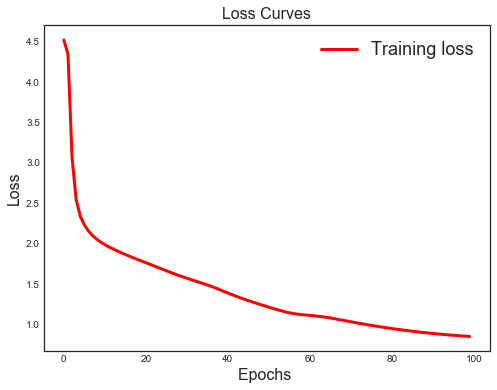

In [30]:
#decreasing length of sentence that feeds into the network
np.random.seed(10)
# Train on a small subset of the data to see what happens
model = RNNVanilla(len(chars))
losses = model.train_with_sgd(XTrain[:100], yTrain[:100],break_points_list=[10,20,30,40,50,60,70,80,90],
                              nepoch=100, learning_rate=0.005, evaluate_loss_after=1)

# Discuss your findings.

# Observation

## By increasing the training samples fed to the network

-the processing time increased. 

-character prediction improved.

-loss curve remain same.

## By reducing hidden layers

-the processing time decresed. 

-character prediction degraded. 

-loss curve decrease faster.
